In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Nombre de lignes et colonnes

In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
data = pd.read_excel('dataset.xlsx')
df = data.copy()
print(df.shape)
df.tail(5)

(5644, 111)


Patient ID  Patient age quantile SARS-Cov-2 exam result  \
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
5639          NaN                                               NaN   
5640          NaN                                               NaN   
5641          NaN                                               NaN   
5642          NaN                                               NaN   
5643    -0.295726                                         -0.353319   

      Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
5639         NaN        NaN                                NaN          NaN   
5640         NaN        NaN                                NaN          NaN   
5641         NaN        NaN                                NaN          NaN   
5642         NaN        NaN                                NaN          NaN   
5643   -1.288428  -1.140144                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
5639                            NaN        NaN   
5640                            NaN        NaN   
5641                            NaN        NaN   
5642                            NaN        NaN   
5643                       0.025985   0.567652   

      Red blood cell distribution width (RDW)  Serum Glucose  \
5639                                      NaN            NaN   
5640                                      NaN            NaN   
5641                                      NaN            NaN   
5642                                      NaN            NaN   
5643                                 -0.18279            NaN   

     Respiratory Syncytial Virus Influenza A Influenza B Parainfluenza 1  \
5639                         NaN         NaN         NaN             NaN   
5640                         NaN         NaN         NaN             NaN   
5641                         NaN         NaN         NaN             NaN   
5642                         NaN         NaN         NaN             NaN   
5643                        

In [3]:
# df.loc[df['SARS-Cov-2 exam result'] == 'negative']
# encoder = LabelEncoder()
# df_test['SARS-Cov-2 exam result'] = encoder.fit_transform(df_test['SARS-Cov-2 exam result'])
# onehotencoder = OneHotEncoder()
# df_test['SARS-Cov-2 exam result'] = onehotencoder.fit_transform(df_test['SARS-Cov-2 exam result'].values.reshape(-1,1)).toarray()
# print(onehotencoder.get_feature_names())
# df_test.tail(5)

# Analyzing data and check laking data and if not important, discard them

<AxesSubplot:>

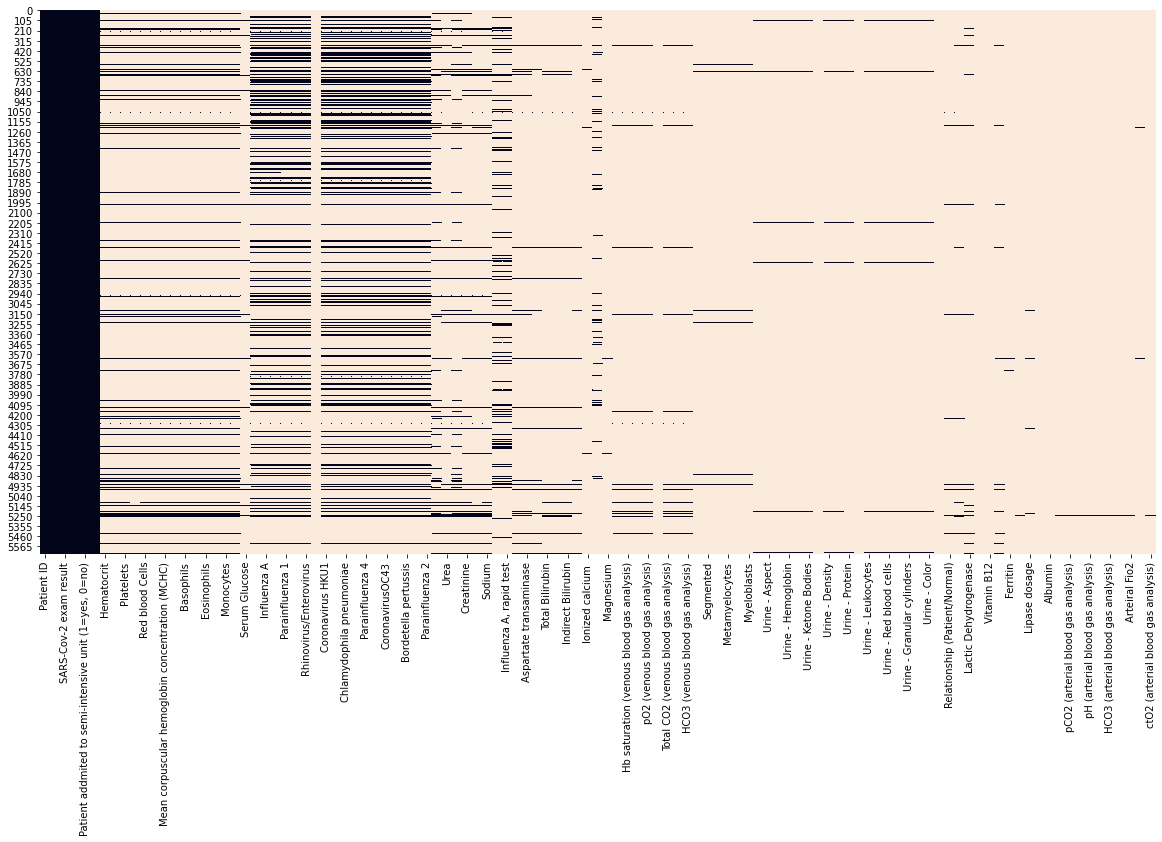

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
# ====== HERE WE SEE THAT THERE'S A LOT OF MISSING DATA (BLANKS)

In [5]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [6]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)
# ====== WE SEE THAT VIRUS ARE CLUSTERED BETWEEN 0.9 AND 0.88, BLOOD TESTS BETWEEN 0.88 AND 0.75 =========

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [7]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]
df.shape

(5644, 39)

<AxesSubplot:>

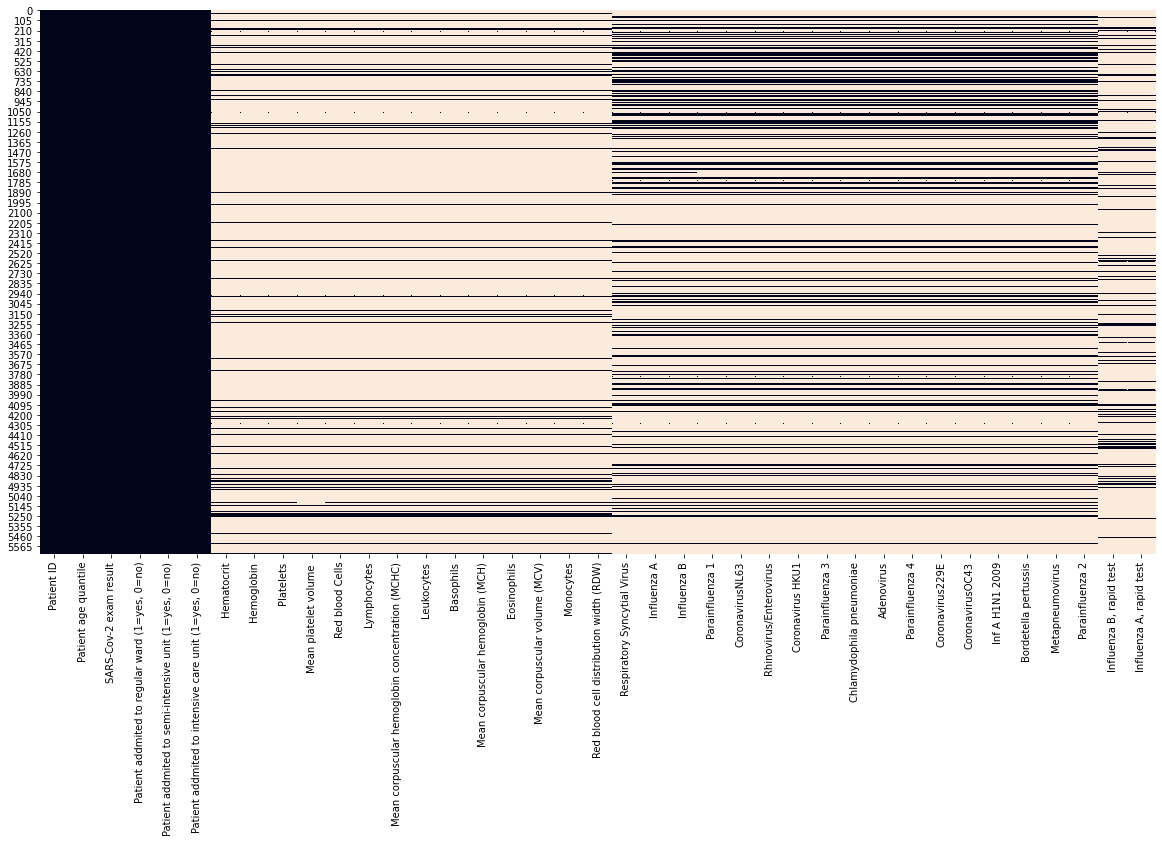

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

# Types of variables and visualisation of feature-target relations

In [9]:
print(df.dtypes.value_counts())
df['SARS-Cov-2 exam result'].value_counts(normalize = True)

object     21
float64    14
int64       4
dtype: int64


negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

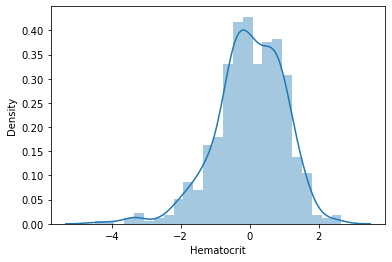

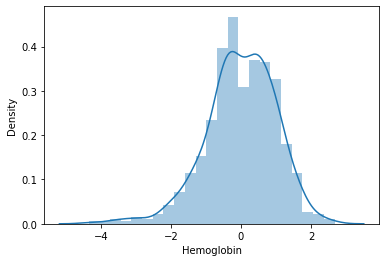

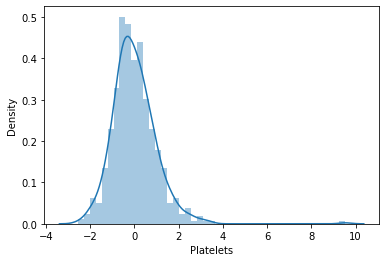

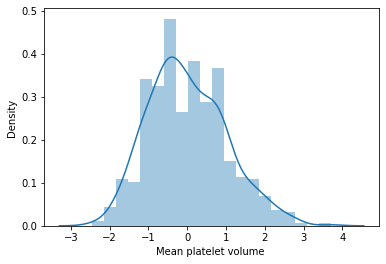

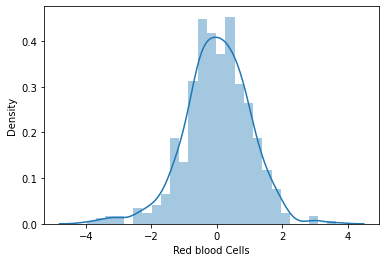

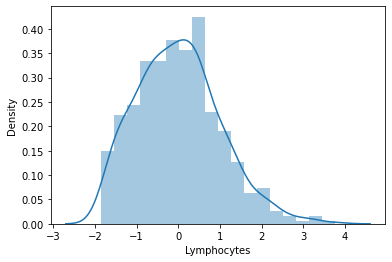

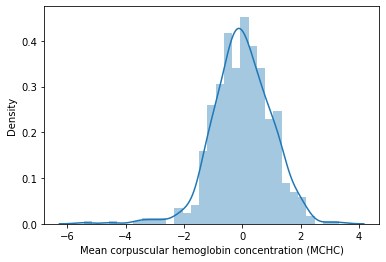

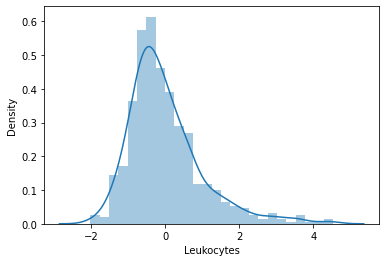

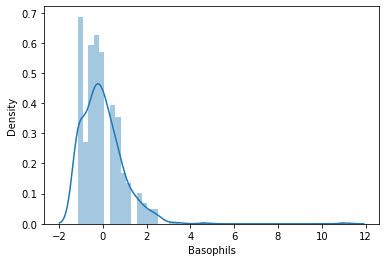

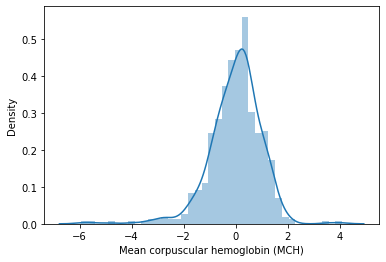

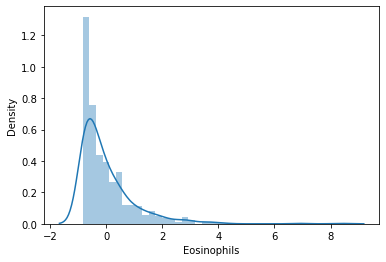

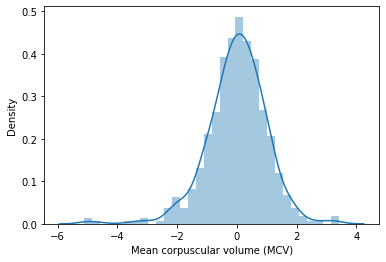

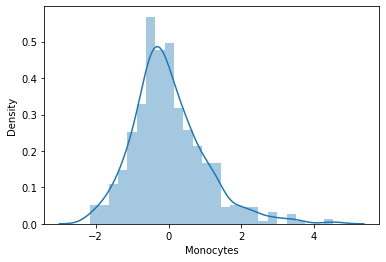

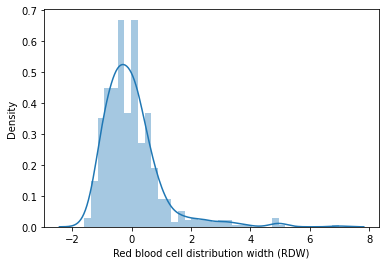

In [10]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

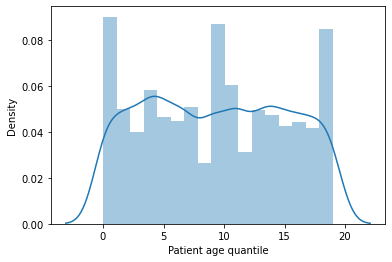

In [11]:
plt.figure()
sns.distplot(df['Patient age quantile'])

In [12]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col:-<40}, {df[col].unique()}')

Patient ID------------------------------, ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result------------------, ['negative' 'positive']
Respiratory Syncytial Virus-------------, [nan 'not_detected' 'detected']
Influenza A-----------------------------, [nan 'not_detected' 'detected']
Influenza B-----------------------------, [nan 'not_detected' 'detected']
Parainfluenza 1-------------------------, [nan 'not_detected' 'detected']
CoronavirusNL63-------------------------, [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------, [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------, [nan 'not_detected' 'detected']
Parainfluenza 3-------------------------, [nan 'not_detected' 'detected']
Chlamydophila pneumoniae----------------, [nan 'not_detected' 'detected']
Adenovirus------------------------------, [nan 'not_detected' 'detected']
Parainfluenza 4----------------------

<ipython-input-14-5c82b7b87ccc>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


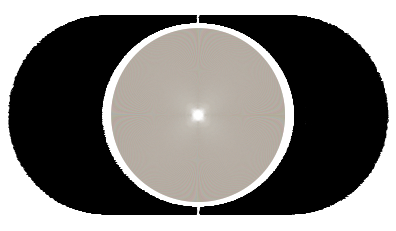

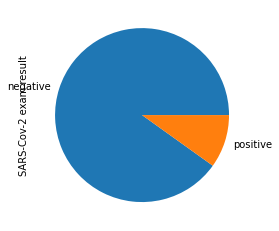

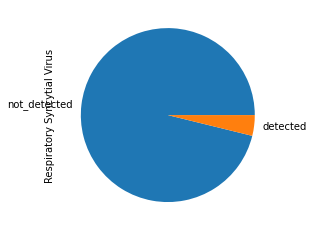

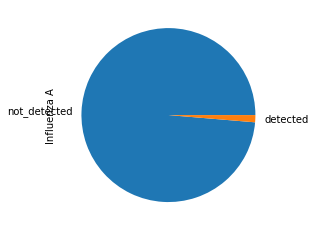

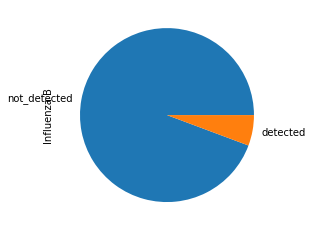

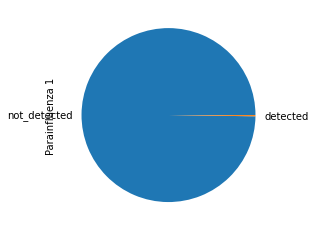

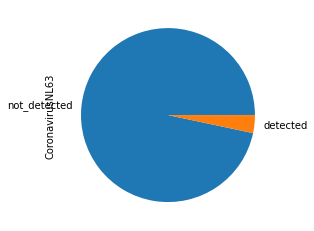

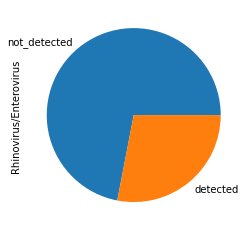

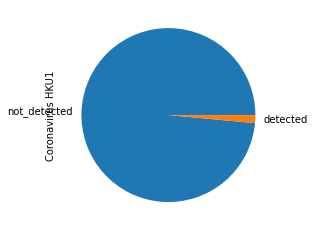

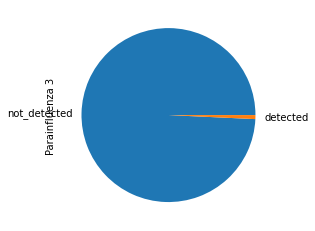

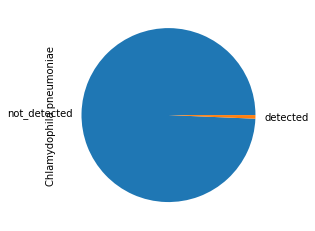

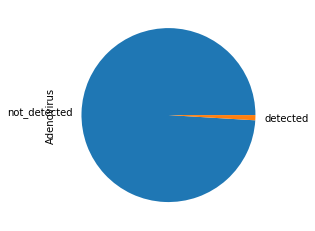

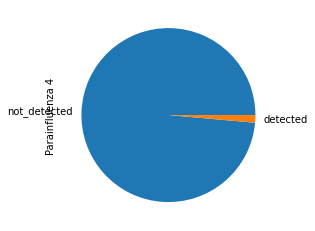

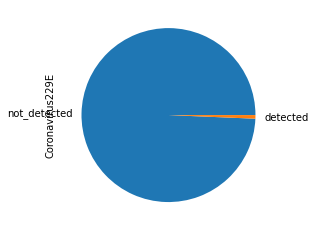

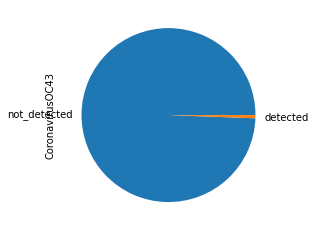

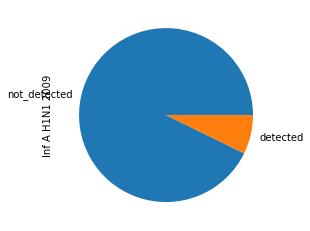

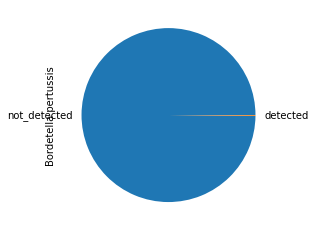

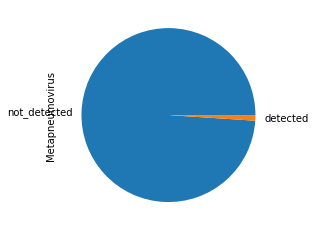

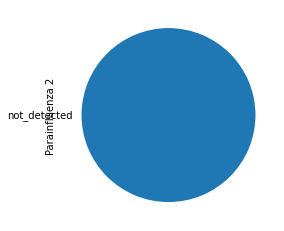

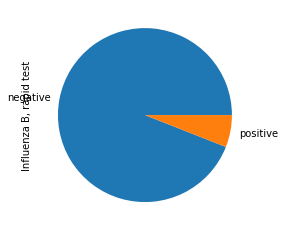

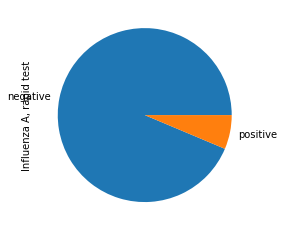

In [14]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [15]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

In [16]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate<0.9) & (missing_rate>0.88)]
viral_columns = df.columns[(missing_rate<0.88) & (missing_rate>0.75)]

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

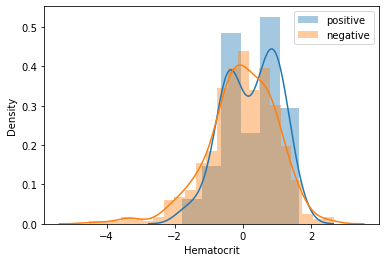

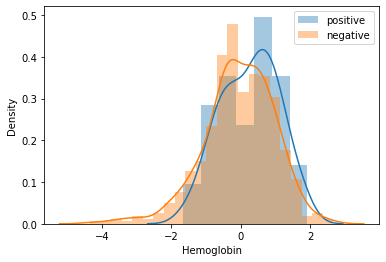

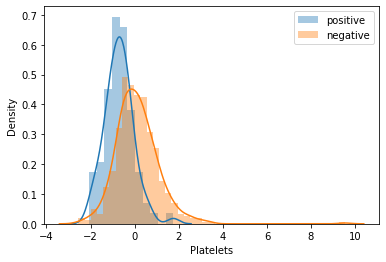

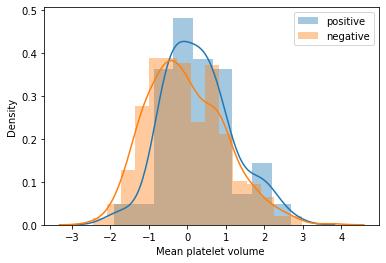

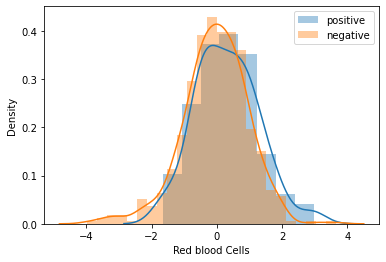

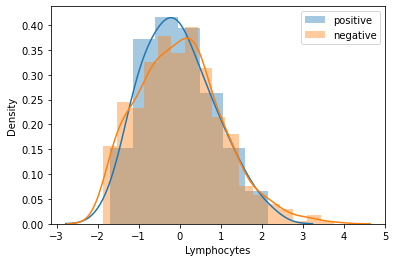

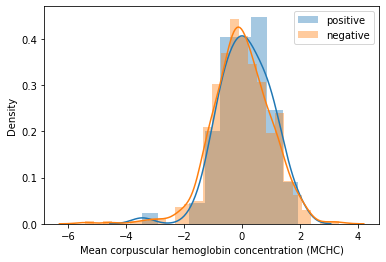

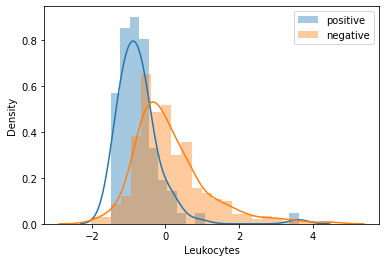

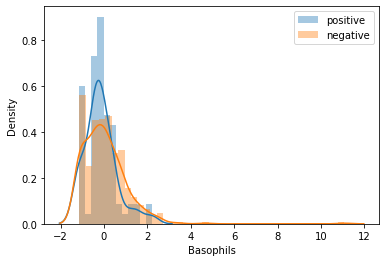

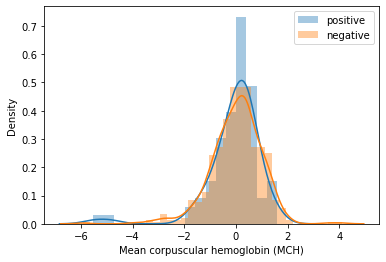

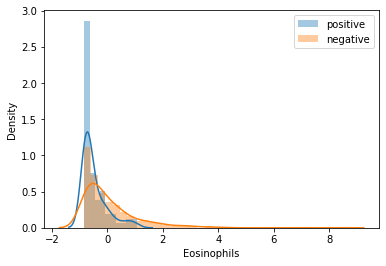

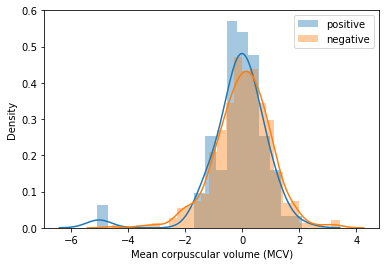

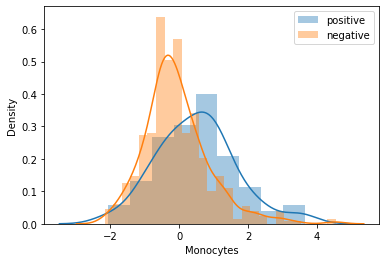

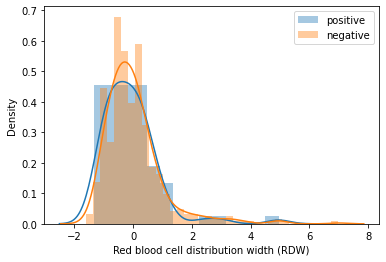

In [17]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

# CA SE VOIT QUE LES LEUKOCYTES ET MONOCYTES ET PLATELETS SONT DIFFERENTS ENTRE LES CAS POSITIVES ET NEGATIVES

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

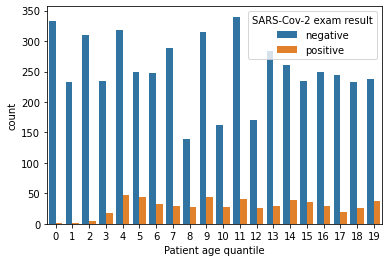

In [18]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)
# ===== CA SE VOIT QUE L'AGE A UN LIEE AVEC LE CORONAVIRUS.  ======

In [19]:
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

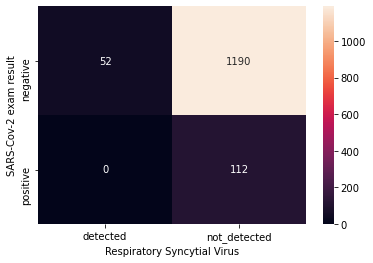

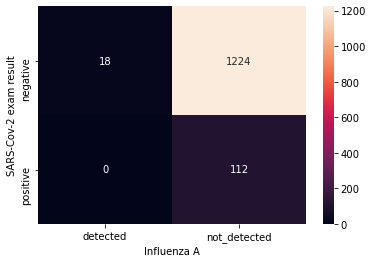

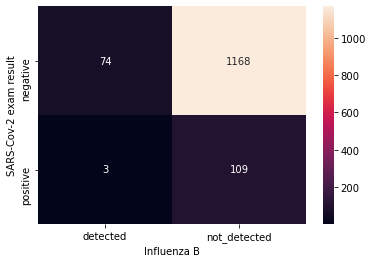

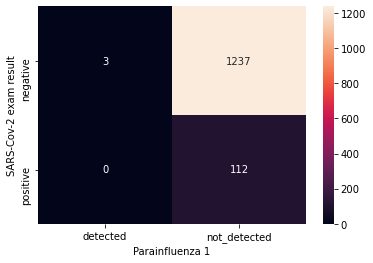

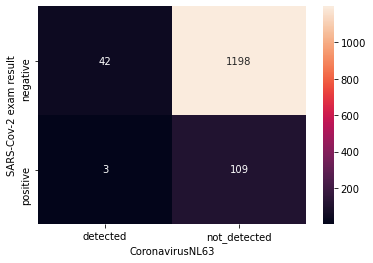

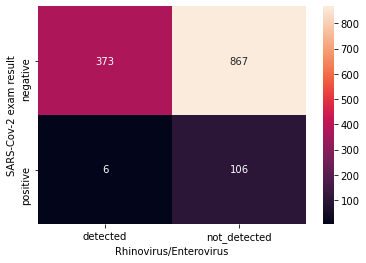

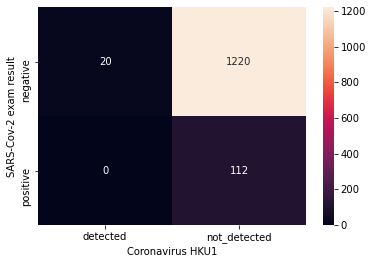

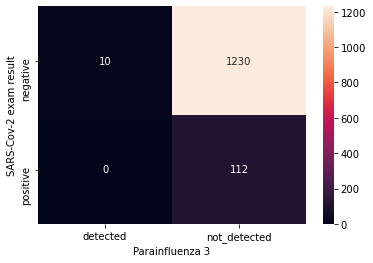

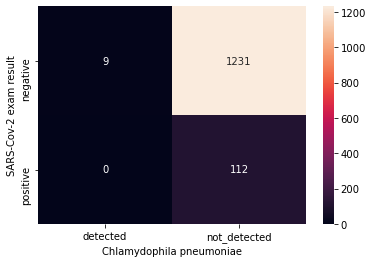

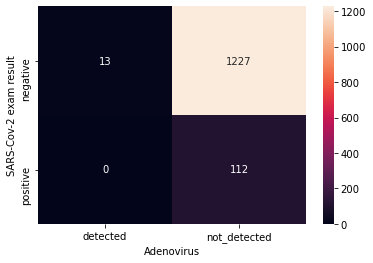

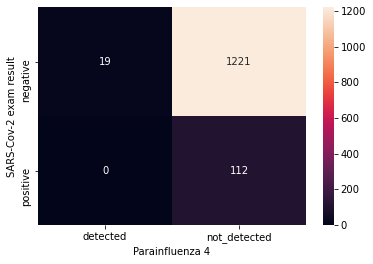

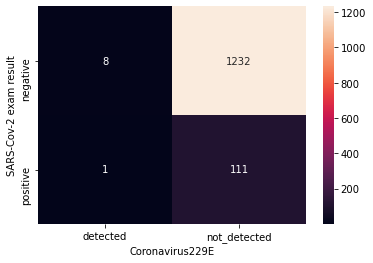

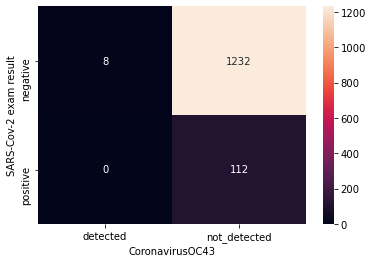

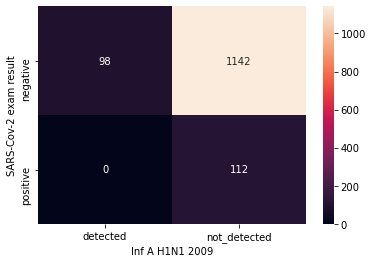

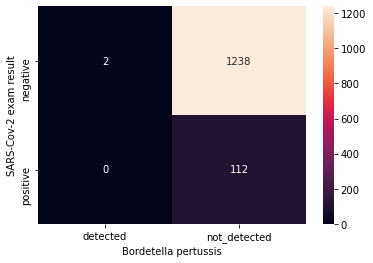

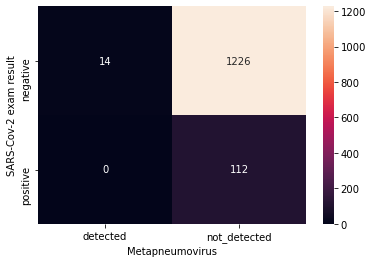

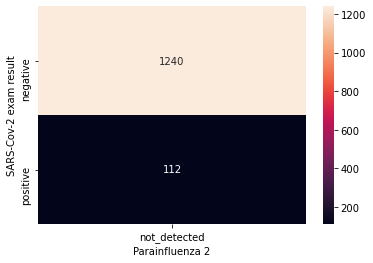

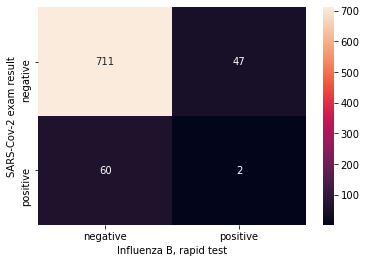

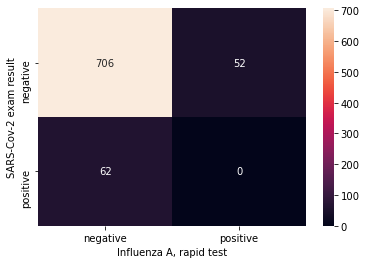

In [20]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True, fmt='d')

# ====== PARAINFLUENZA 2 EST BIZARRE ====
# ====== INDIVIDUS ATTEINTS D'UNE QUELCONQUE MALADIE ONT DES TAUX SIGNIFICATIVEMENT DIFFERENTS

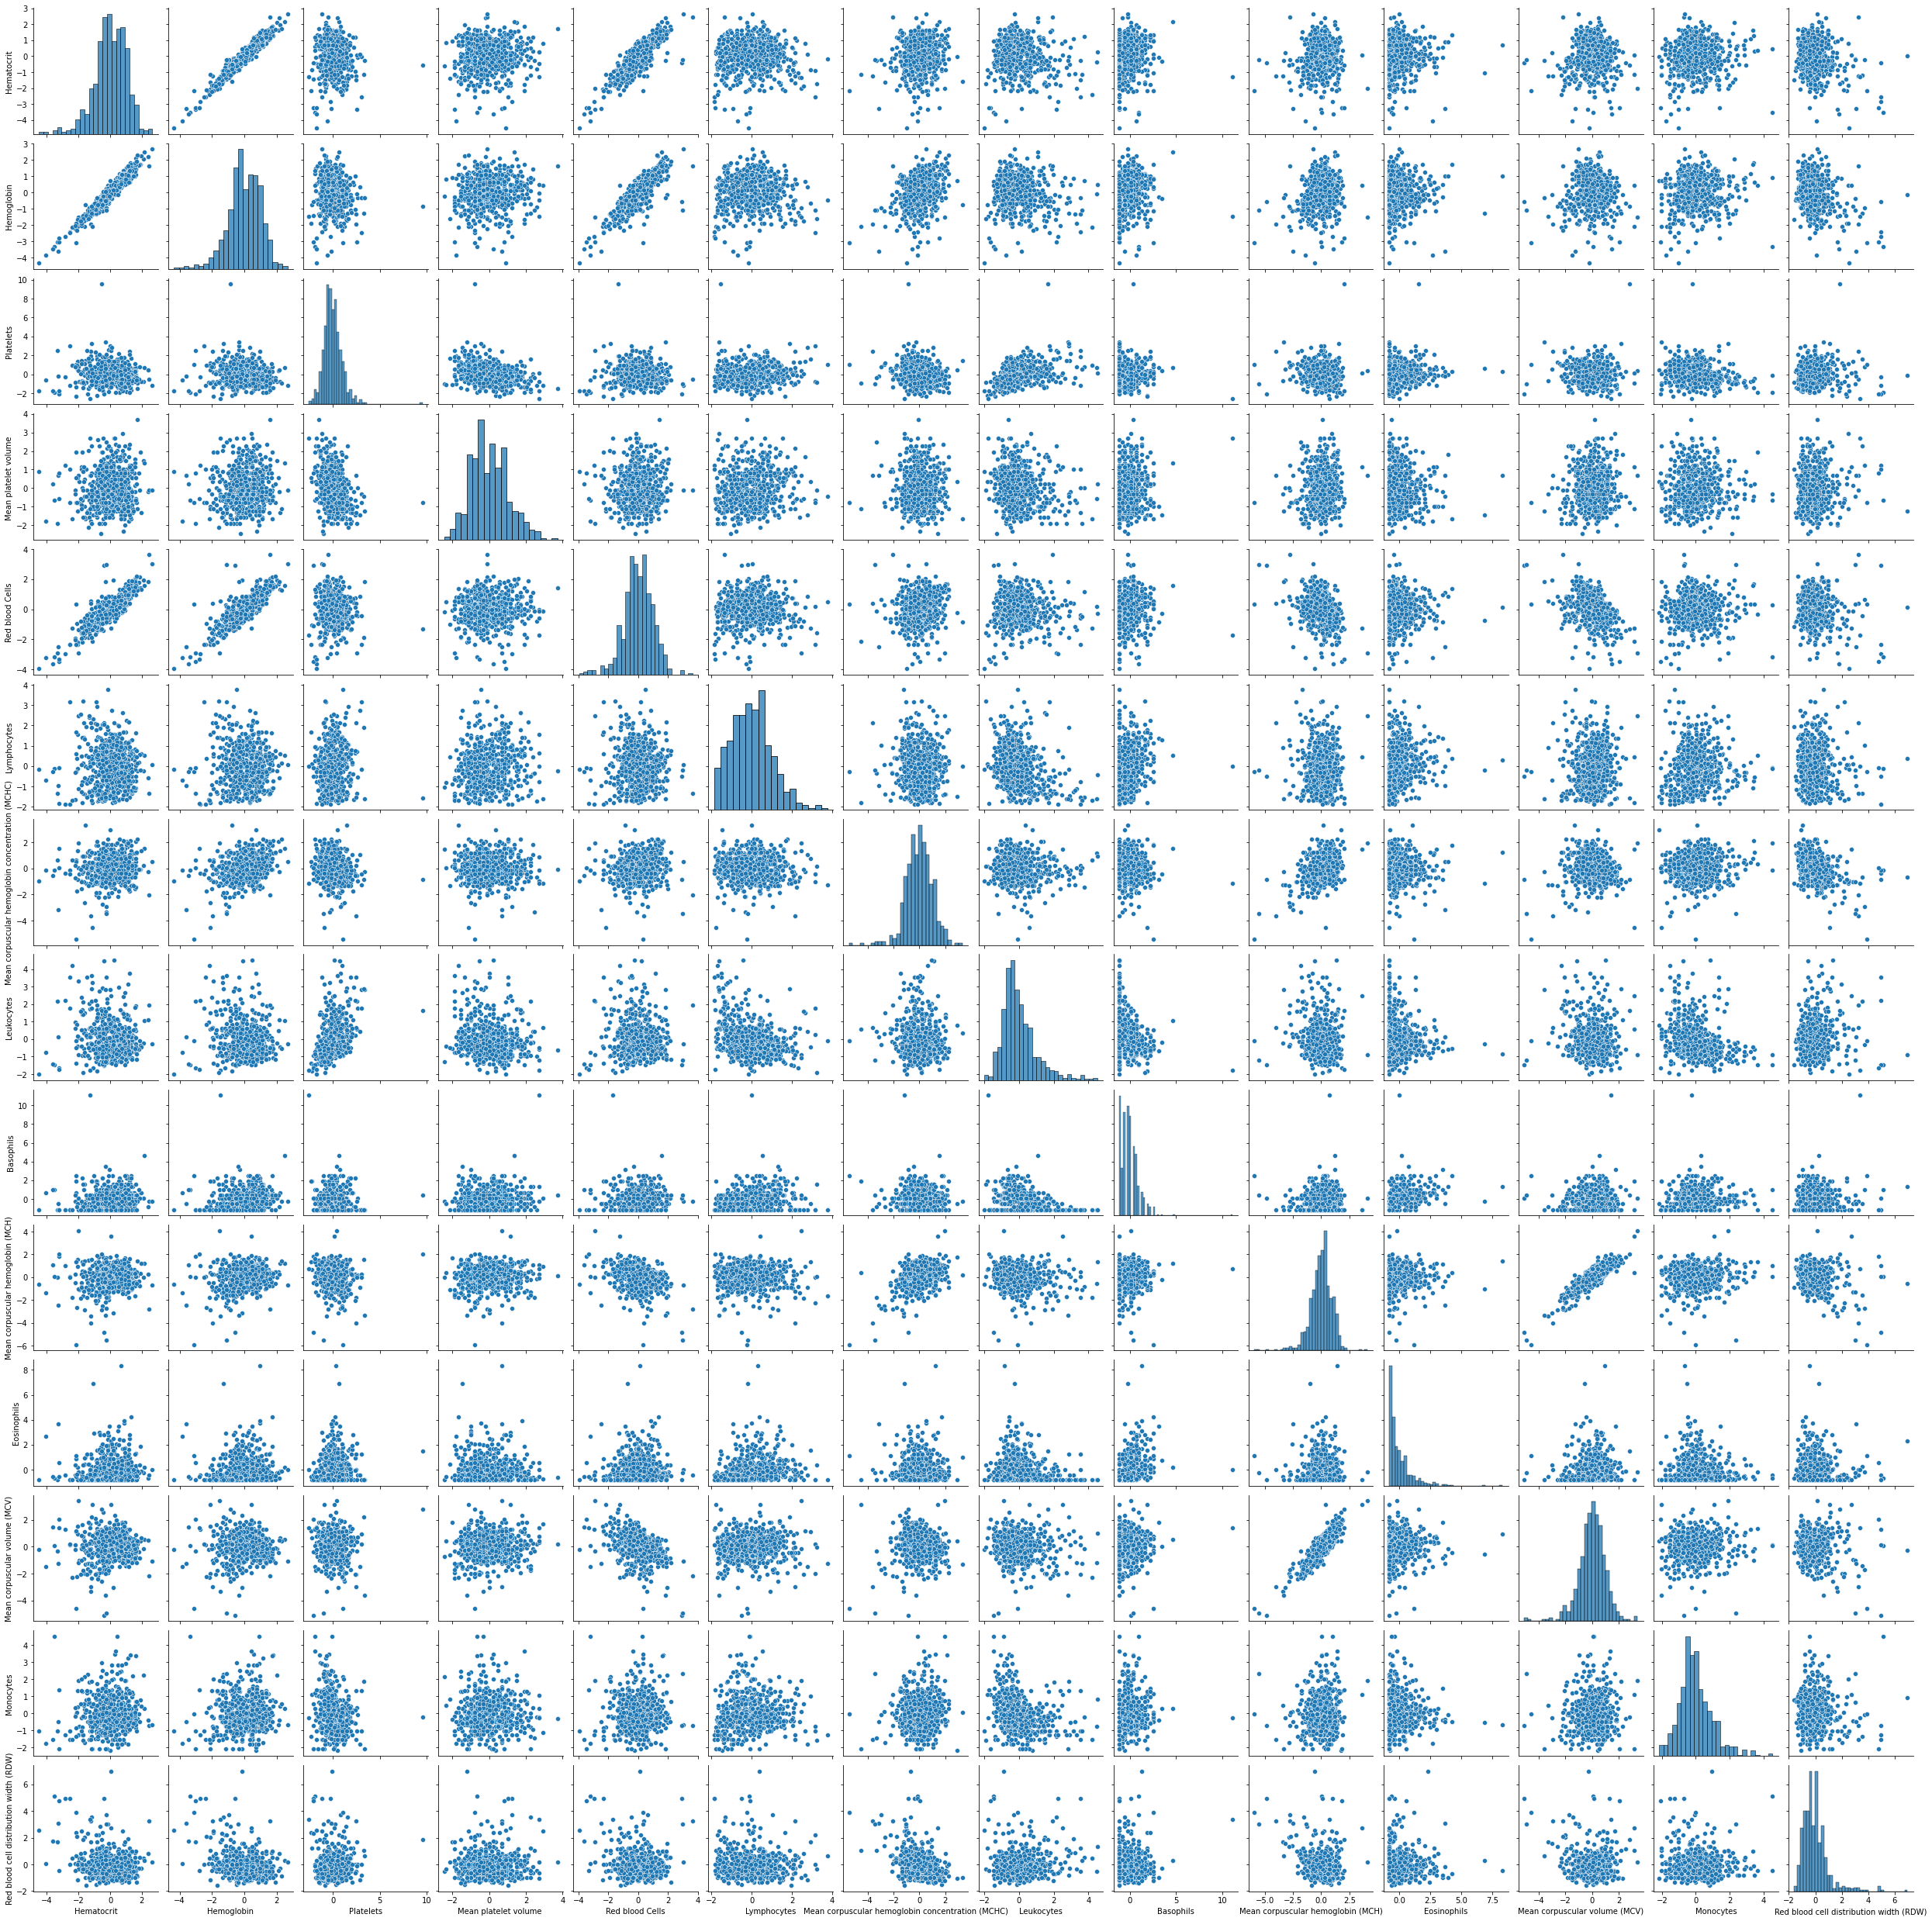

In [21]:
# ======= SEULEMENT L'UTILISER APRES AVOIR FILTRER UN PEU LES DONNEES
sns.pairplot(df[blood_columns])

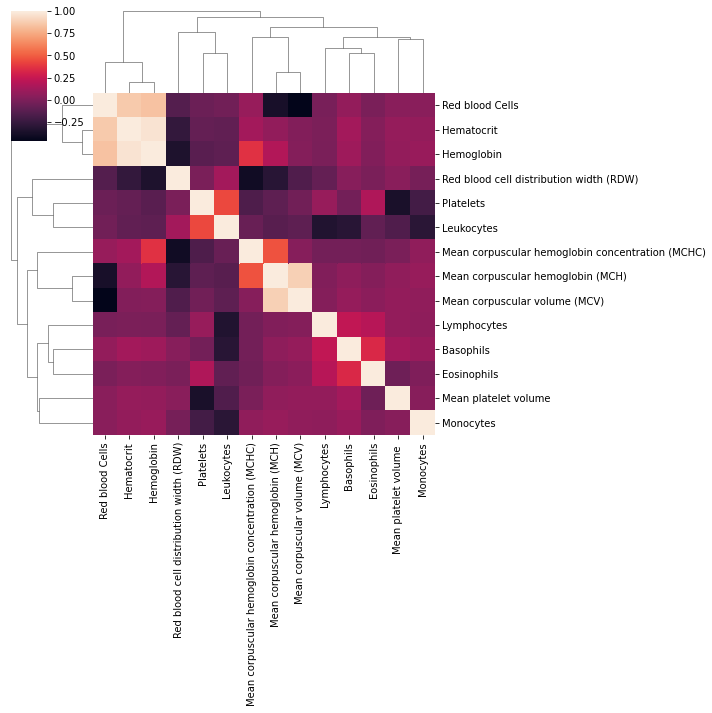

In [22]:
# ====== FACON PLUS RAPIDE D'ANALYSER LES GRAPHS AU DESSUS (AVEC DES CORRELATIONS) ===
sns.clustermap(df[blood_columns].corr())
#  OU 
# sns.heatmap(df[blood_columns].corr())

<ipython-input-23-c64aa3076311>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

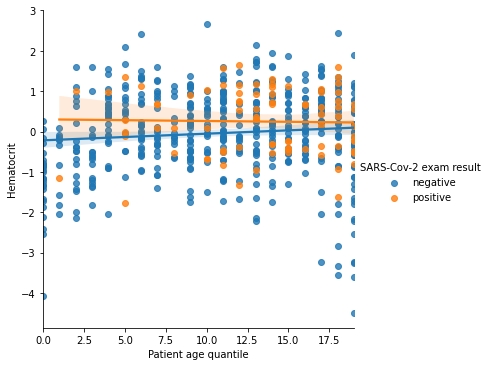

<Figure size 432x288 with 0 Axes>

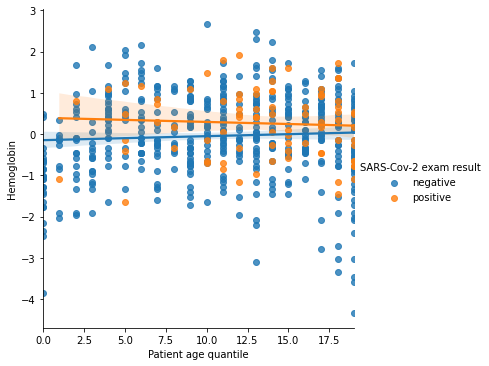

<Figure size 432x288 with 0 Axes>

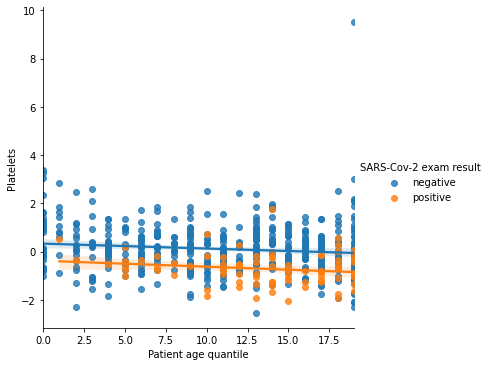

<Figure size 432x288 with 0 Axes>

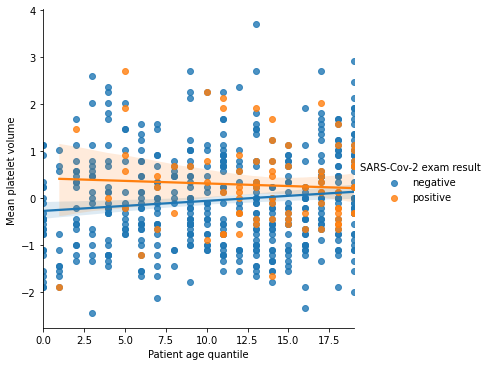

<Figure size 432x288 with 0 Axes>

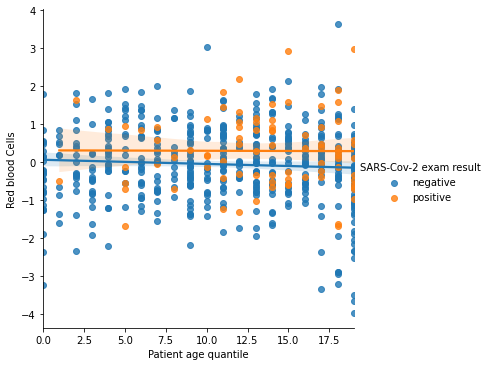

<Figure size 432x288 with 0 Axes>

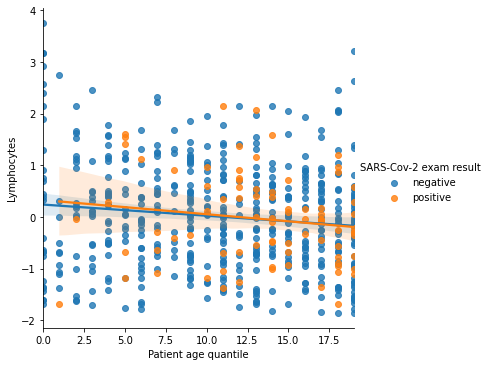

<Figure size 432x288 with 0 Axes>

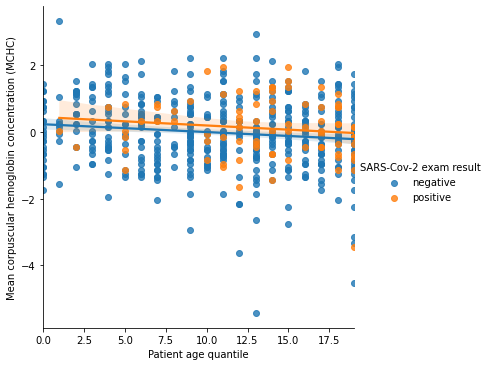

<Figure size 432x288 with 0 Axes>

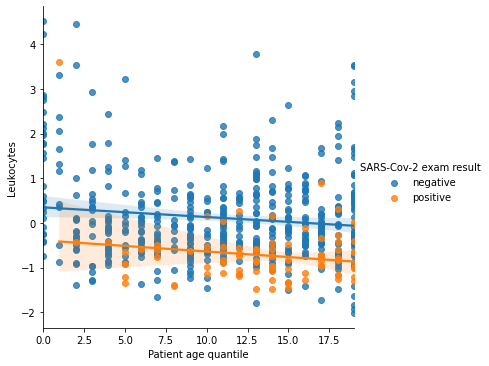

<Figure size 432x288 with 0 Axes>

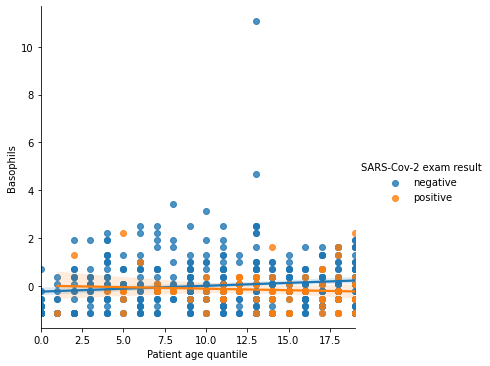

<Figure size 432x288 with 0 Axes>

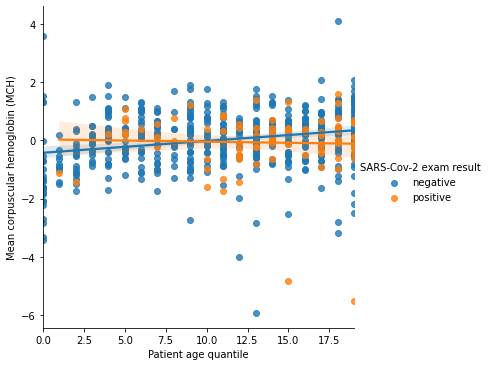

<Figure size 432x288 with 0 Axes>

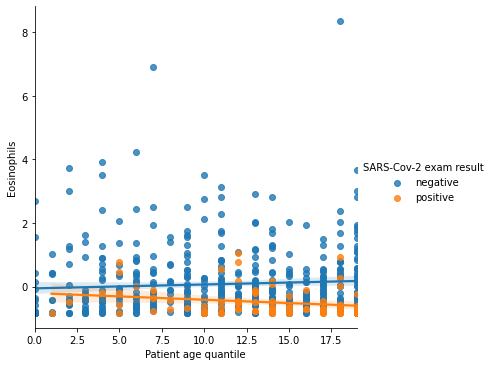

<Figure size 432x288 with 0 Axes>

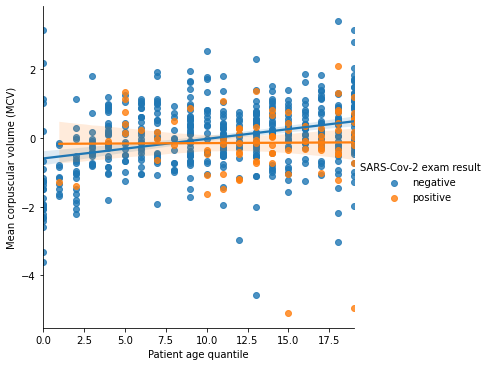

<Figure size 432x288 with 0 Axes>

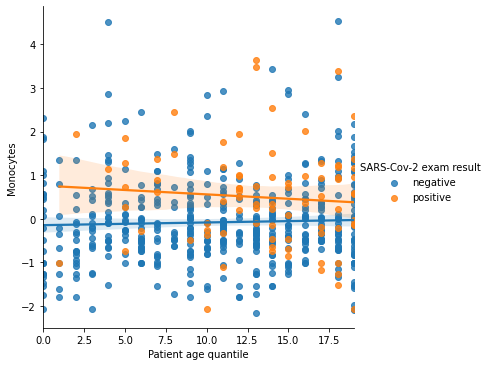

<Figure size 432x288 with 0 Axes>

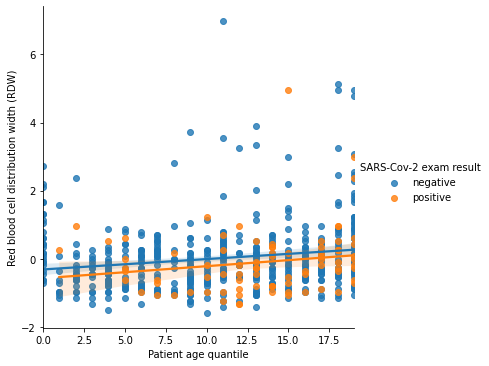

In [23]:
# ======= VOIR CORRELATION ENTRE LAGE ET AUTRES VARIABLES ======
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result',data=df)

In [24]:
# ======== CORRELATION EN VALEURS DE L'AGE ET AUTRES VARIABLES
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

# Bizar case, searching on internet we found out that the rapid test is weak

In [25]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [26]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [27]:
df['est malade'] = np.sum(df[viral_columns[:-2]] =='detected', axis=1)>=1 # TESTE POSITIVE POUR PLUS D'UNE MALADIE
df.head(5)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [28]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


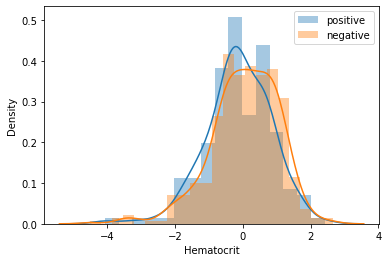

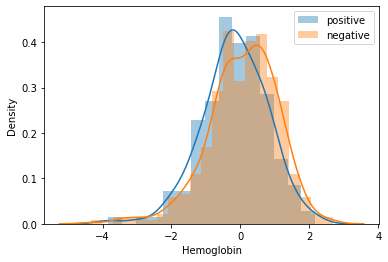

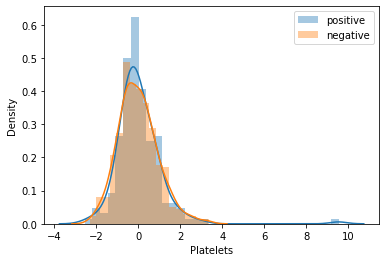

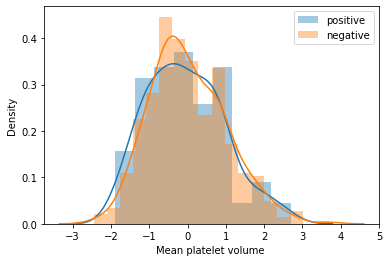

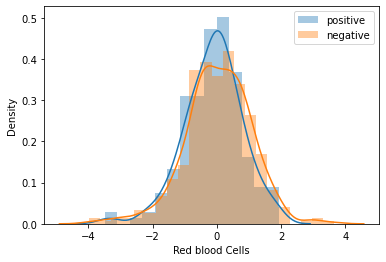

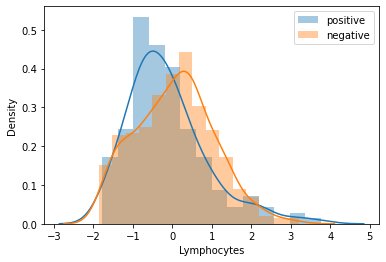

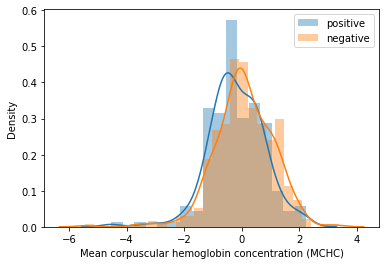

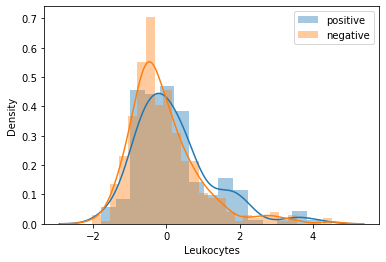

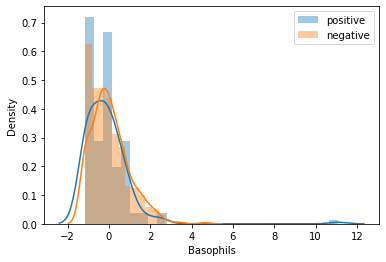

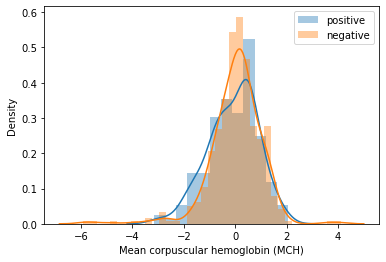

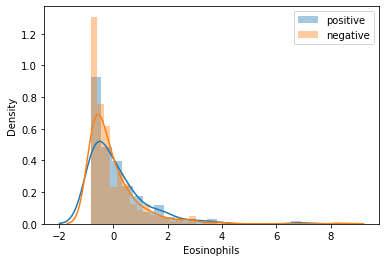

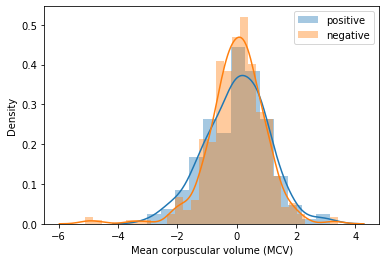

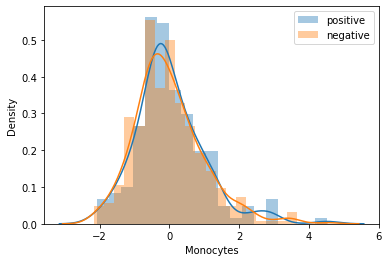

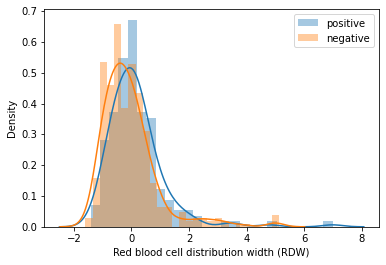

In [29]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='positive')
    sns.distplot(non_malade_df[col], label='negative')
    plt.legend()
    
# ON VOIT QUE DANS LE TAUX SANGUIN ENTRE MALADE ET COVID SONT DIFFERENTS

In [30]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']:
        return 'soins intensives'
    else:
        return 'inconnu'

In [31]:
df['statut'] = df.apply(hospitalisation, axis=1)

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

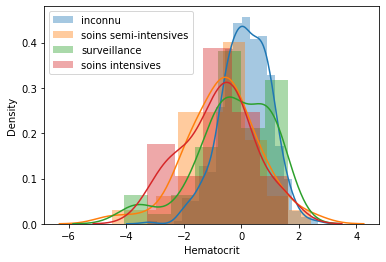

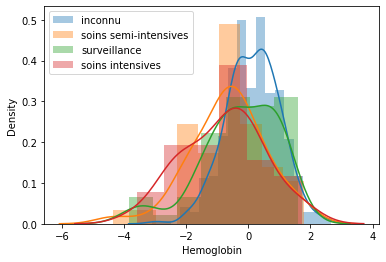

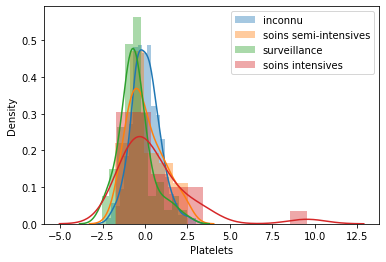

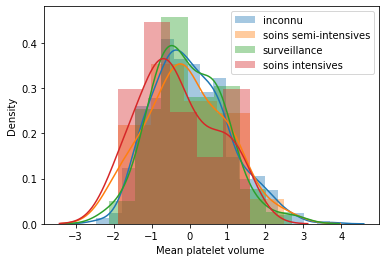

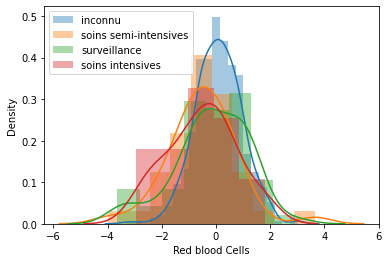

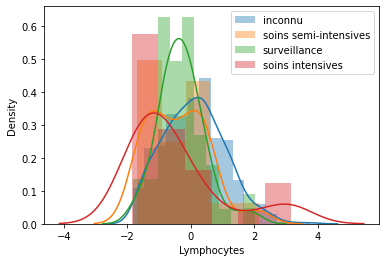

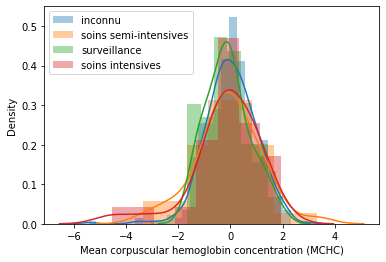

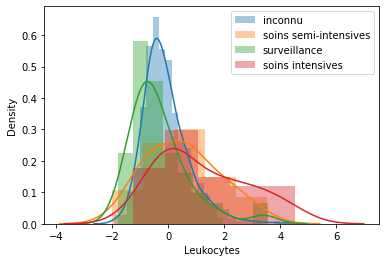

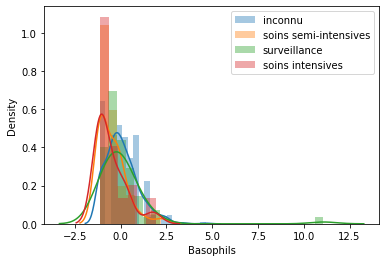

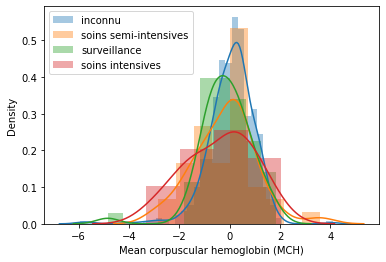

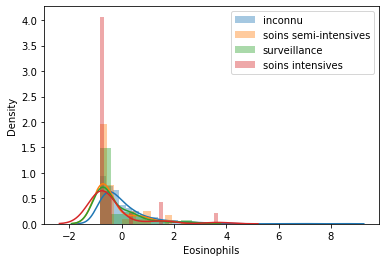

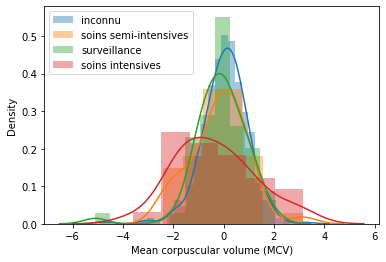

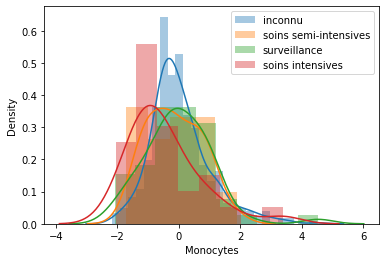

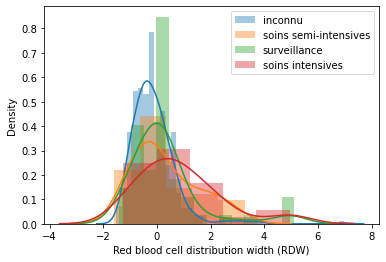

In [32]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

# ANALYSE DETAILLE DES VALEURS MANQUANTS

In [33]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

<ipython-input-33-e25a4f66b2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [34]:
df1 = df[blood_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

<ipython-input-34-cf465f894038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.864775
positive    0.135225
Name: covid, dtype: float64

# TESTE D'HYPOTHESE
- les individus atteints du covid-19 ont de taux de leukocyte,monocytes, platelets significativement differents
    - HO = Les taux moyens sont EGAUX chez les individus positives et negatives
    
- les individus atteints d'une quelconque maladie ont des taux significativement differents

In [35]:
# TEST DE T STUDENT  -  Verifie si la moyenne entre 2 distributions est significativement differente
from scipy.stats import ttest_ind

In [36]:
print(positive_df.shape)
print(negative_df.shape)

(558, 39)
(5086, 39)


In [37]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [38]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejete'
    else:
        return 0

In [39]:
for col in blood_columns:
    print(f'{col:-<60}{t_test(col)}')

Hematocrit--------------------------------------------------0
Hemoglobin--------------------------------------------------0
Platelets---------------------------------------------------H0 Rejete
Mean platelet volume ---------------------------------------0
Red blood Cells---------------------------------------------0
Lymphocytes-------------------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)------------0
Leukocytes--------------------------------------------------H0 Rejete
Basophils---------------------------------------------------0
Mean corpuscular hemoglobin (MCH)---------------------------0
Eosinophils-------------------------------------------------H0 Rejete
Mean corpuscular volume (MCV)-------------------------------0
Monocytes---------------------------------------------------H0 Rejete
Red blood cell distribution width (RDW)---------------------0


# ==================== PRE-PROCESSING =======================

# creation des sous-ensembles suite au EDA

In [122]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [123]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [124]:
df = df[key_columns + blood_columns] # + viral_columns]
print(df.shape)
df.head()

(5644, 16)


Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  
0                                      NaN  
1                                -0.625073  
2                                      NaN  
3                                      NaN  
4                                      NaN

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [127]:
print(trainset['SARS-Cov-2 exam result'].value_counts())
print(testset['SARS-Cov-2 exam result'].value_counts())

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64
negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64


# ENCODAGE

In [128]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
#     df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [129]:
X_train, y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [130]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Modelisation dans le pre-processing

In [191]:
from sklearn.tree import DecisionTreeClassifier   #arbre de decision, pas besoin des donnes normalises
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier #arbre de decision, pas besoin des donnes normalises
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import SelectKBest,f_classif
# f_classif est le test d'ANOVA

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA



In [174]:
model = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=10),
                      RandomForestClassifier(random_state=0))


# Procedure d'evaluation 

In [175]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [180]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[89  6]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111



/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Feat

/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/marcosera/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Feat

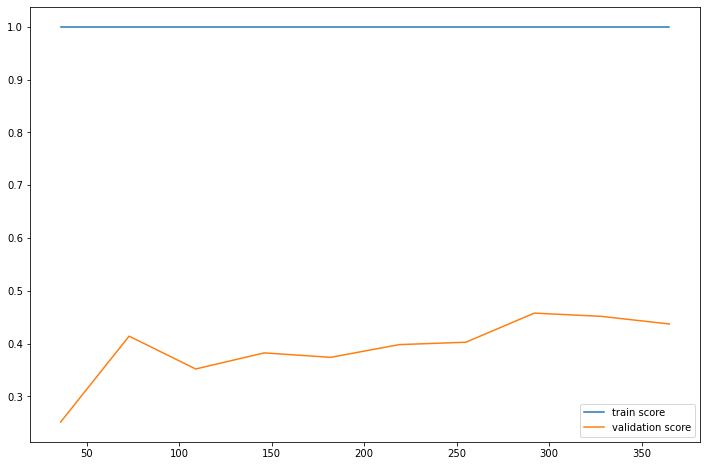

In [181]:
evaluation(model)
# RECALL ligne 1 = cas negatives, a gauche les reussites de prevision, a droit les fautes, impliquent sur le recall
# Par contre, ligne 2, echecs a gauche et reussites a droit.

# Learning Curve: Overfitting, puisque le train score =100% alors que le modele est faible dans le validation score.
# alors on peut augmenter la quantite de donnee dans l'entrainement du modele ou selectioner bien les bonnes var

In [187]:
# model.feature_importances_

In [186]:
# pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))
# on voit que les variables de sang sont importante, mais pas les liees aux virus> du coup, peut etre faire un 
# dropna sur les donnees sang et dropper tout les virales.Ou changer de modele c'est une option

# MODELING

In [ ]:
#MODELING
from sklearn.svm import SVC # bien pour des algoth de taille petite/intermediaire (1000/10 000 donnees)
# a besoin des donnees normalises
from sklearn.neighbors import KNeighborsClassifier # a besoin des donnees normalises

In [202]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif,k=10))
# include_bias=False --> pout eviter l'enorme quantite de notifications

In [203]:
RandonForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [212]:
dict_of_models={'RandonForest': RandonForest, 'AdaBoost': AdaBoost, 'SVM': SVM, 'KNN': KNN}

RandonForest
[[89  6]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[87  8]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        95
           1       0.47      0.44      0.45        16

    accuracy                           0.85       111
   macro avg       0.69      0.68      0.68       111
weighted avg       0.84      0.85      0.84       111

SVM
[[92  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.62      0.31      0.42        16

    accuracy                           0.87       111
   macro avg       0.76      0.64      0.67  

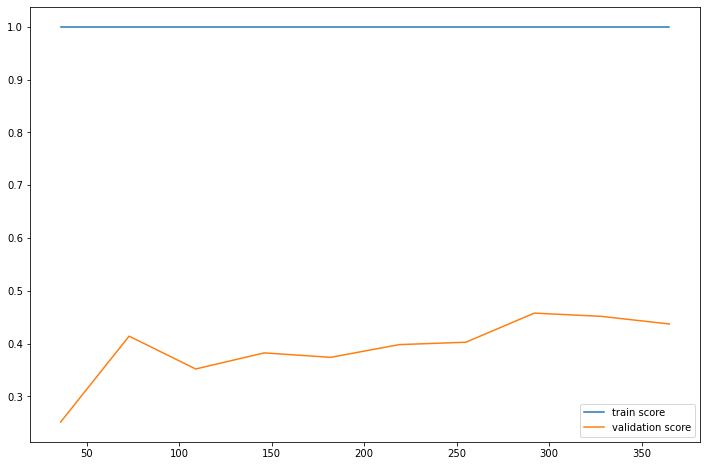

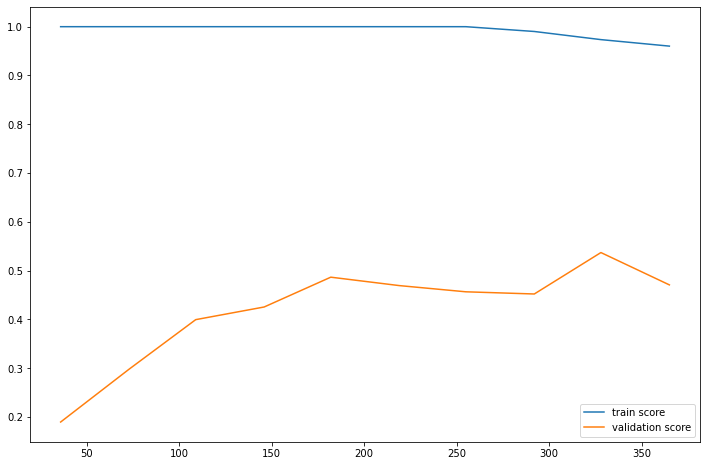

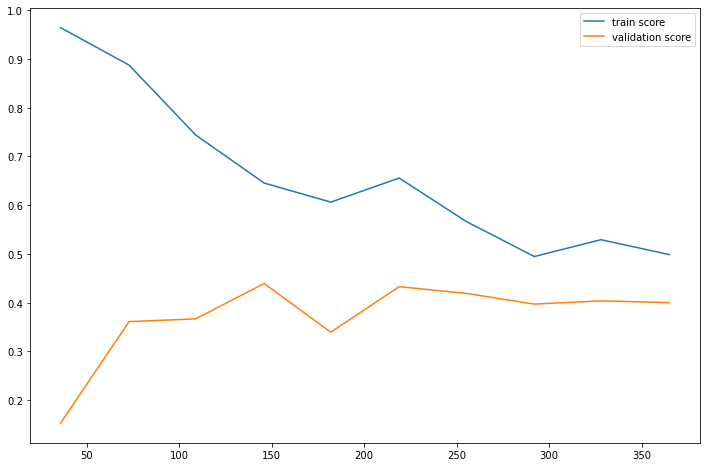

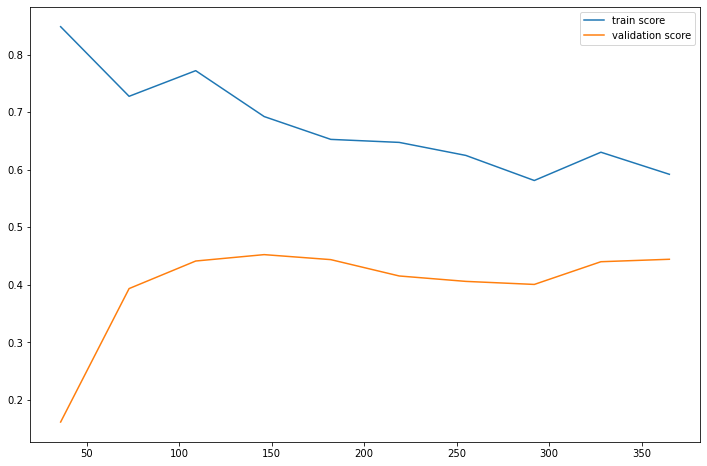

In [214]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

# on analise la curve d'apprentissage et les f1-score, recall des var faibles. Pour choisir les meilleurs modeles
# e apres, faire l'optimization

# Optimization

In [228]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# RandomizedSearchCV choisit un nombre define de parametres de facon aleatoire pour tester et trouver leur meilleurs
# valeurs

In [229]:
# SVM.get_params().keys()
SVM.get_params()
# verifier le coeficient de penalite svc__C: 1.0 et le svc__gamma': 'scale'

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest())])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest())]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest())],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__order': 'C',
 'pipeline__selectkbest__k

In [230]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3, 4],
               'pipeline__selectkbest__k': range(45, 60)}

In [233]:
# grid = GridSearchCV(SVM, hyper_params, scoring='recall', cv=4)
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall',
                          cv=4, n_iter=40)
# scoring c'est le valeur a optimiser
# cv est le Cross Validation
grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0001, 'svc__C': 1000, 'pipeline__selectkbest__k': 51, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.43      0.38      0.40        16

    accuracy                           0.84       111
   macro avg       0.66      0.65      0.65       111
weighted avg       0.83      0.84      0.83       111



[[87  8]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.43      0.38      0.40        16

    accuracy                           0.84       111
   macro avg       0.66      0.65      0.65       111
weighted avg       0.83      0.84      0.83       111



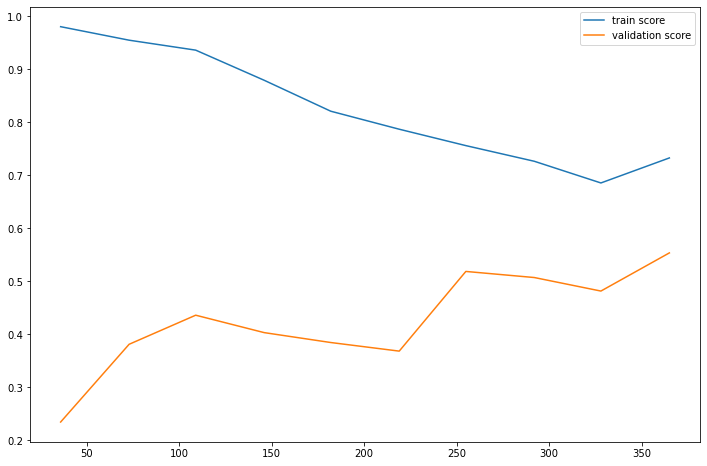

In [234]:
evaluation(grid.best_estimator_)

# Precision Call Curve

In [236]:
from sklearn.metrics import precision_recall_curve

In [238]:
grid.best_estimator_.decision_function

<function sklearn.pipeline.Pipeline.decision_function(self, X)>

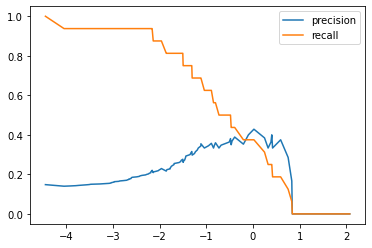

In [239]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

plt.plot(threshold, precision[:-1], label='precision') # precision[:-1] tjs un avant le dernier
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

# le point optimale est le point de croisement des deux lignes, mais des fois on peut sacrifier un peu de recall
# pour avoir un peu plus de precision

In [240]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [245]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [246]:
from sklearn.metrics import recall_score

In [247]:
recall_score(y_test, y_pred)

0.625

In [248]:
f1_score(y_test, y_pred)

0.4444444444444445

In [ ]:
#f1_score et recall sont bons pour des questions binaires comme si la personne est malade ou pas

# des idees encore a ameliorer le modele: equilibrer plus les cas positives et negatives en ajoutant plus 
# d'echantillon positives (OverSampling). C'est une technique un peu dangereuse.